## Análisis de datos - Clase 6

---
### Comparación de técnicas de selección de features. Consideraciones importantes.
---

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split


#### 1) Correlación: para tener en cuenta

In [20]:
np.random.seed(42)
df = pd.DataFrame(range(-100,101,1), columns=['x'])
df['y1'] = 10 * df['x'] + 2
df['y2'] = 1/np.exp(df['x'])
df['y3'] = np.square(df['x'])

df.head()

,x,y1,y2,y3
0,-100,-998,2.688117e+43,10000
1,-99,-988,9.889030e+42,9801
2,-98,-978,3.637971e+42,9604
3,-97,-968,1.338335e+42,9409
4,-96,-958,4.923458e+41,9216


Text(0, 0.5, 'y3')

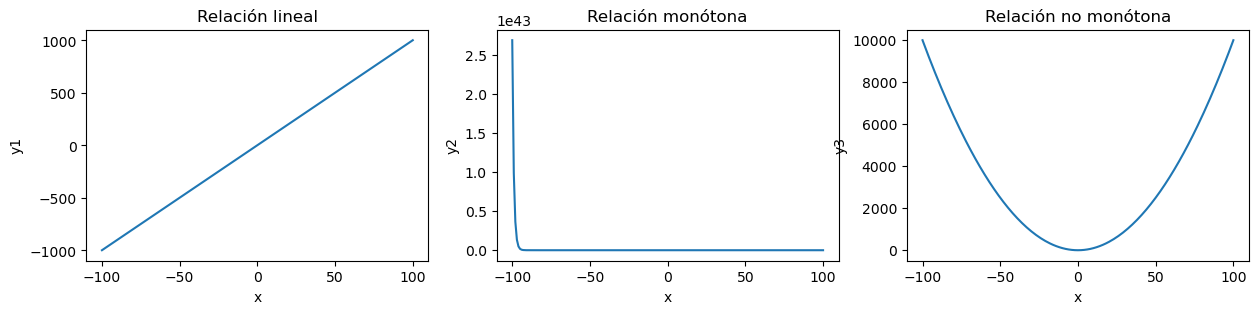

In [21]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.plot(df['x'],df['y1'],'-')
plt.title('Relación lineal')
plt.xlabel('x')
plt.ylabel('y1')

plt.subplot(1,3,2)
plt.plot(df['x'],df['y2'],'-')
plt.title('Relación monótona')
plt.xlabel('x')
plt.ylabel('y2')

plt.subplot(1,3,3)
plt.plot(df['x'],df['y3'],'-')
plt.title('Relación no monótona')
plt.xlabel('x')
plt.ylabel('y3')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       201 non-null    int64  
 1   y1      201 non-null    int64  
 2   y2      201 non-null    float64
 3   y3      201 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


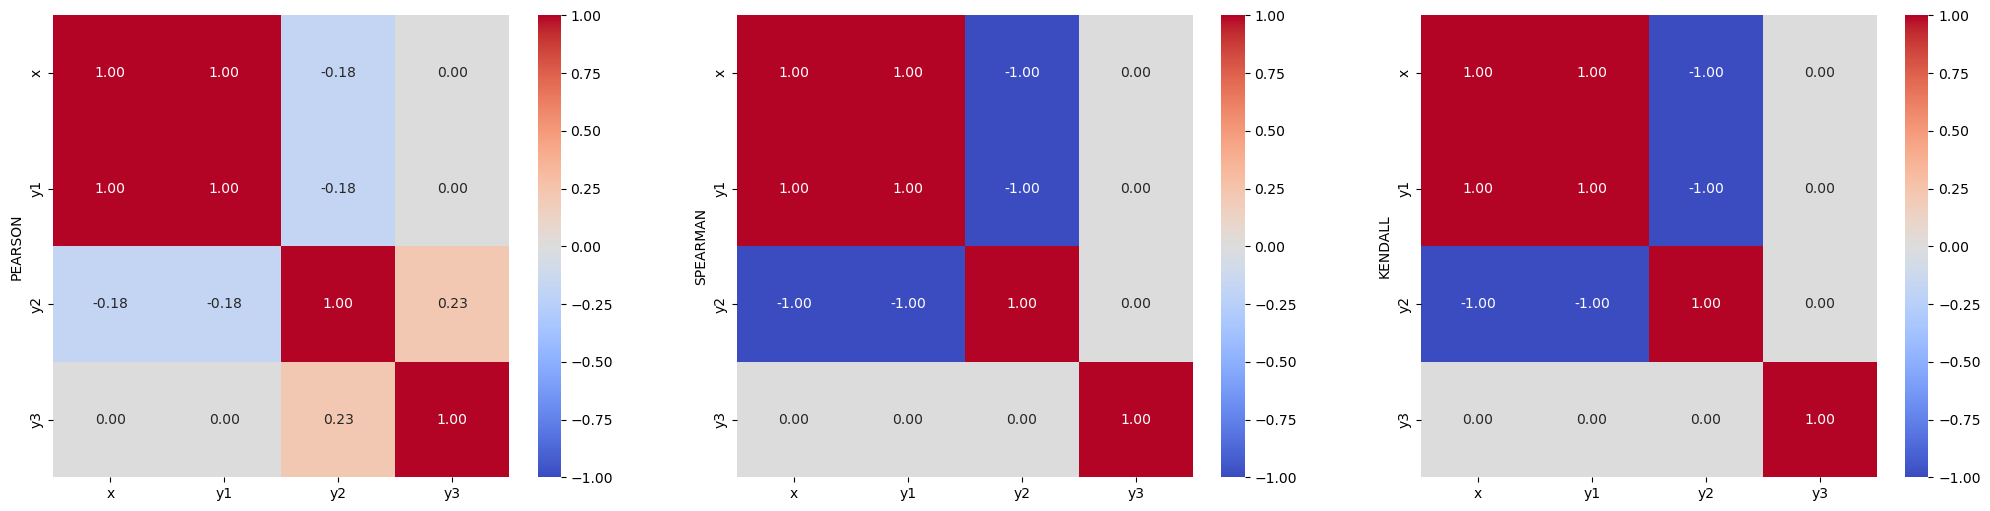

In [23]:
plt.figure(figsize=(25,6))

plt.subplot(1, 3, 1)
sns.heatmap(
    df.corr(numeric_only=False), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1)
plt.ylabel('PEARSON')

plt.subplot(1, 3, 2)
sns.heatmap(
    df.corr(method='spearman', numeric_only=False),
    annot=True, 
    fmt=".2f",  
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('SPEARMAN')

plt.subplot(1, 3, 3)
sns.heatmap(
    df.corr(method='kendall', numeric_only=False), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('KENDALL')

plt.show()


Obs:
* Pearson no detecta las relaciones con y2 (monónotona no lineal) e y3 (no monótona, no lineal).
* Kendall y Spearman no detectan las relaciones con y3 (no monótona, no lineal), pero sí con y2.
* Ninguno detecta la relación cuadrática entre x e y3 (no monótona).
* Notar que con Pandas en ningún caso se está evaluando la signficancia estadística (p-valor)


#### 2) Spearman vs Kendall con Scipy 

In [24]:
from scipy.stats import spearmanr, kendalltau, pearsonr

In [25]:
# Datos del ejemplo https://docs.google.com/spreadsheets/d/1W6f4nm18RMWiCcvai9nSA2MSaAWh8O5g_iFH38AIRTo/edit?gid=785503293#gid=785503293

distancia = [50, 175, 250, 375, 425]
precio_agua = [1.8, 1.25, 2.0, 1.0, 1.1]

# Calcular corr de Spearman
pearson_corr, pearson_p = pearsonr(distancia, precio_agua)

# Calcular corr de Spearman
spearman_corr, spearman_p = spearmanr(distancia, precio_agua)

# Calcular corr de Kendall
kendall_corr, kendall_p = kendalltau(distancia, precio_agua)

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.3f}, p-valor: {pearson_p:.3f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.3f}, p-valor: {spearman_p:.3f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.3f}, p-valor: {kendall_p:.3f}")

Coeficiente de correlación de Pearson: -0.640, p-valor: 0.245
Coeficiente de correlación de Spearman: -0.600, p-valor: 0.285
Coeficiente de correlación de Kendall: -0.400, p-valor: 0.483
